In [22]:
import pandas as pd
import glob
import os

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)

data_path = r"C:\Users\metec\OneDrive\Masaüstü\MachineLearningCVE" 

# All csv files
csv_files = glob.glob(os.path.join(data_path, "*.csv"))

for f in csv_files:
    print("-", os.path.basename(f))
    
    
dfs = []

for f in csv_files:
    df = pd.read_csv(f)
    dfs.append(df)

df_raw = pd.concat(dfs, ignore_index=True)
df_raw.columns = df_raw.columns.str.strip()
df_raw.head()

- Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
- Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
- Friday-WorkingHours-Morning.pcap_ISCX.csv
- Monday-WorkingHours.pcap_ISCX.csv
- Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
- Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
- Tuesday-WorkingHours.pcap_ISCX.csv
- Wednesday-workingHours.pcap_ISCX.csv


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [23]:
print("\nLabels")
print(df_raw["Label"].value_counts())

pd.set_option('display.max_rows', None)
print(df_raw.columns)



Labels
Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64
Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow

In [24]:
import numpy as np
import pandas as pd


# RAW DATA COPY
df_raw = df_raw.copy()
print("Raw:", df_raw.shape)


# INF / BIG VALUE CLEANING → df_clean_values

df_clean_values = df_raw.copy()

numeric_cols = df_clean_values.select_dtypes(include=["float", "int"]).columns
threshold = 1e12

# INF to NaN
df_clean_values[numeric_cols] = df_clean_values[numeric_cols].replace([np.inf, -np.inf], np.nan)

# Very large values to NaN
df_clean_values[numeric_cols] = df_clean_values[numeric_cols].mask(df_clean_values[numeric_cols] > threshold, np.nan)

print("Before NaN drop:", df_clean_values.shape)
df_clean_values = df_clean_values.dropna()
print("After NaN drop:", df_clean_values.shape)

# BENIGN OUTLIER REMOVAL → df_outlier_cleaned

benign_df = df_clean_values[df_clean_values["Label"] == "BENIGN"].copy()
attack_df = df_clean_values[df_clean_values["Label"] != "BENIGN"].copy()

numeric_cols = benign_df.select_dtypes(include=["float", "int"]).columns

Q1 = benign_df[numeric_cols].quantile(0.25)
Q3 = benign_df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

mask = ~((benign_df[numeric_cols] < lower) |
         (benign_df[numeric_cols] > upper)).any(axis=1)

benign_cleaned = benign_df[mask]

df_outlier_cleaned = pd.concat([benign_cleaned, attack_df], axis=0).reset_index(drop=True)
print("After outlier removal:", df_outlier_cleaned.shape)


# HIGH CORRELATION FEATURE REMOVAL → df_reduced

numeric_df = df_outlier_cleaned.select_dtypes(include=["float", "int"])
corr_matrix = numeric_df.corr().abs()

upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print("Dropped correlated features:", len(to_drop))
print(to_drop)

df_reduced = df_outlier_cleaned.drop(columns=to_drop)
print("After correlation reduction:", df_reduced.shape)



# SET FINAL DATAFRAME FOR NEXT STEPS

df = df_reduced.copy()
print("FINAL DF READY:", df.shape)


Raw: (2830743, 79)
Before NaN drop: (2830743, 79)
After NaN drop: (2827876, 79)
After outlier removal: (812778, 79)
Dropped correlated features: 30
['Total Backward Packets', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Total', 'Fwd IAT Std', 'Fwd IAT Max', 'Bwd IAT Std', 'Bwd IAT Max', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'SYN Flag Count', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'act_data_pkt_fwd', 'Active Max', 'Idle Mean', 'Idle Max', 'Idle Min']
After correlation reduction: (812778, 49)
FINAL DF READY: (812778, 49)


In [25]:
# # CLASS BLANCING
# df["Label"] = df["Label"].replace({
#     # DoS attacks
#     "DoS Hulk": "DoS",
#     "DoS GoldenEye": "DoS",
#     "DoS slowloris": "DoS",
#     "DoS Slowhttptest": "DoS",

#     # Web attacks
#     "Web Attack � Brute Force": "WebAttack",
#     "Web Attack � XSS": "WebAttack",
#     "Web Attack � Sql Injection": "WebAttack",

#     # Patator
#     "FTP-Patator": "Patator",
#     "SSH-Patator": "Patator",

#     # Rare attacks
#     "Heartbleed": "RareAttack",
#     "Infiltration": "RareAttack"
# })

# print(df["Label"].value_counts())



In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=["Label"])
y = df["Label"]

print("X:", X.shape)
print("y örnek:", y.head())

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Class mapping:")
for i, cls in enumerate(le.classes_):
    print(f"{i} → {cls}")

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded,
    test_size=0.30,        # 30% test+val 
    random_state=42,
    stratify=y_encoded
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,        # 0.50 of 30% → %15 test, %15 val
    random_state=42,
    stratify=y_temp
)

print("Train :", X_train.shape)
print("Val   :", X_val.shape)
print("Test  :", X_test.shape)


X: (812778, 48)
y örnek: 0    BENIGN
1    BENIGN
2    BENIGN
3    BENIGN
4    BENIGN
Name: Label, dtype: object
Class mapping:
0 → BENIGN
1 → Bot
2 → DDoS
3 → DoS GoldenEye
4 → DoS Hulk
5 → DoS Slowhttptest
6 → DoS slowloris
7 → FTP-Patator
8 → Heartbleed
9 → Infiltration
10 → PortScan
11 → SSH-Patator
12 → Web Attack � Brute Force
13 → Web Attack � Sql Injection
14 → Web Attack � XSS
Train : (568944, 48)
Val   : (121917, 48)
Test  : (121917, 48)


In [27]:


from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# NORMALIZATION
scalers = {
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
}

scaled_data = {}

for name, scaler in scalers.items():
    scaler.fit(X_train)
    
    scaled_data[name] = {
        "X_train": scaler.transform(X_train),
        "X_val": scaler.transform(X_val),
        "X_test": scaler.transform(X_test)
    }

from sklearn.utils.class_weight import compute_class_weight

#CLASS WEIGHTING
classes = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)

class_weights_dict = {cls: w for cls, w in zip(classes, class_weights)}
class_weights_dict


data = scaled_data["standard"]
X_train_scaled = data["X_train"]
X_val_scaled = data["X_val"]
X_test_scaled = data["X_test"]


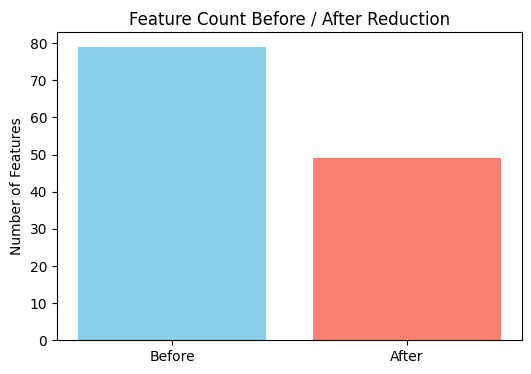

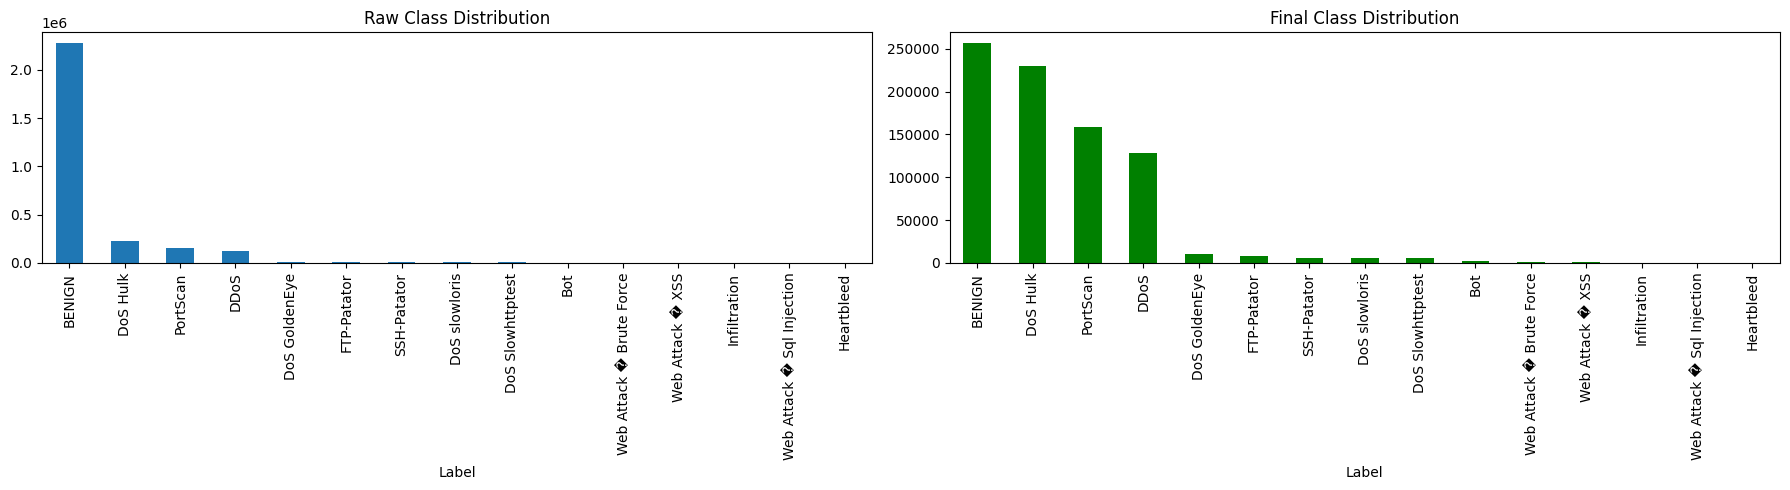

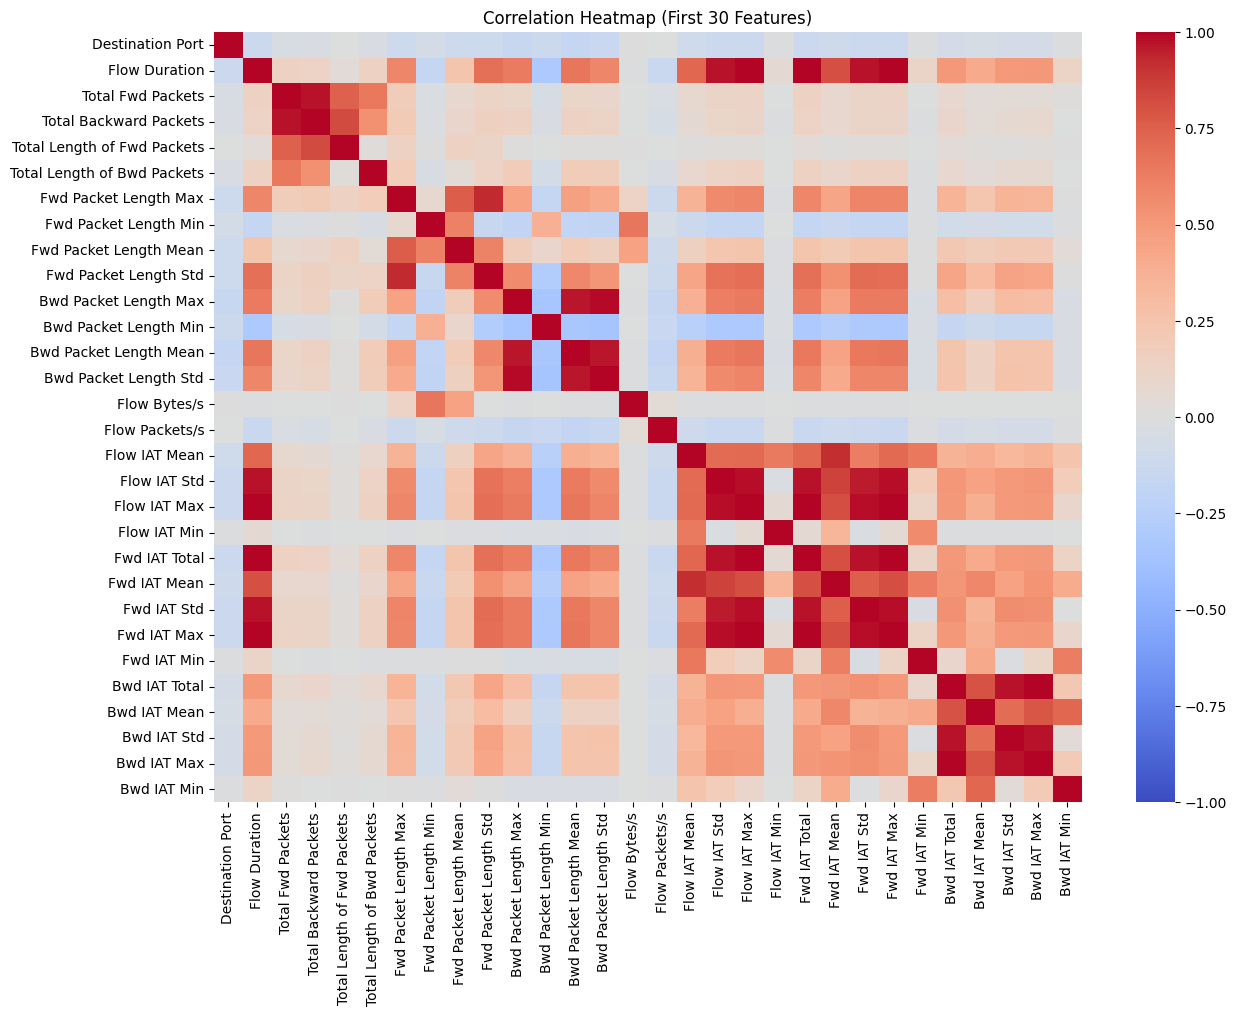

C:\Users\metec\AppData\Local\Temp\ipykernel_18104\3780868036.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rep_pairs.append((col, rep, corr_vals[1]))


                   Removed                 Most Similar  Correlation
0   Total Backward Packets       Total Backward Packets     1.000000
1   Bwd Packet Length Mean       Bwd Packet Length Mean     1.000000
2    Bwd Packet Length Std        Bwd Packet Length Max     0.991230
3             Flow IAT Std                 Flow IAT Max     0.981379
4             Flow IAT Max                  Fwd IAT Max     0.999941
5            Fwd IAT Total                Flow Duration     0.999848
6              Fwd IAT Std                     Idle Max     0.977624
7              Fwd IAT Max                 Flow IAT Max     0.999941
8              Bwd IAT Std                  Bwd IAT Max     0.974815
9              Bwd IAT Max                Bwd IAT Total     0.996639
10       Fwd Header Length            Fwd Header Length     1.000000
11       Bwd Header Length            Total Fwd Packets     0.976486
12           Fwd Packets/s               Flow Packets/s     0.992154
13       Max Packet Length        

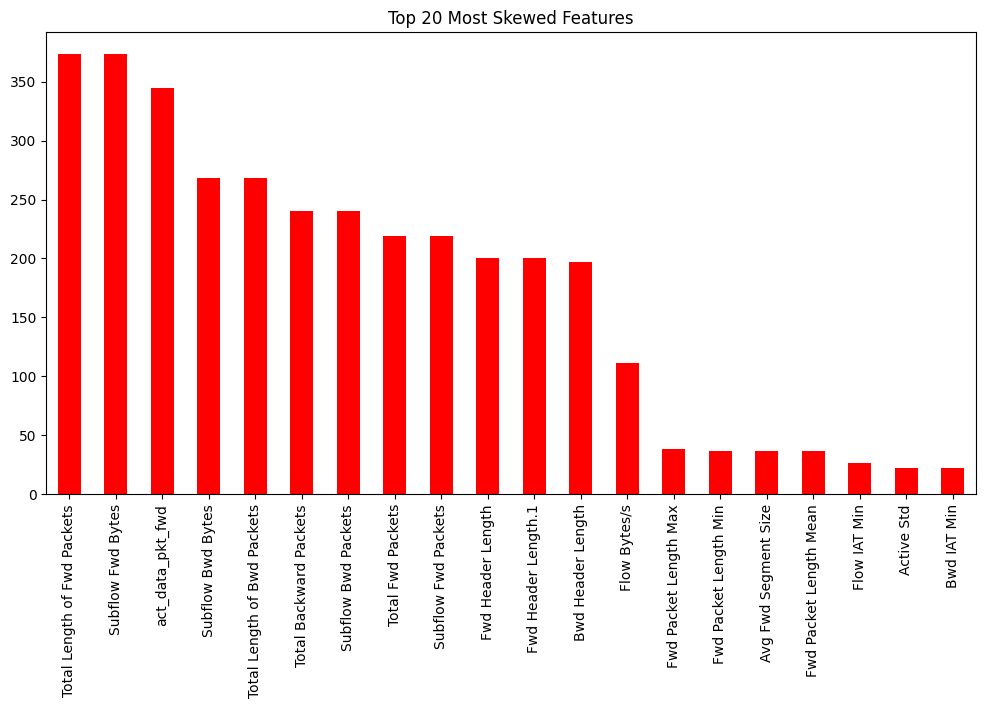

Most skewed features:
 Total Length of Fwd Packets    373.342897
Subflow Fwd Bytes              373.342897
act_data_pkt_fwd               344.199108
Subflow Bwd Bytes              268.264422
Total Length of Bwd Packets    268.264422
Total Backward Packets         240.475452
Subflow Bwd Packets            240.475452
Total Fwd Packets              218.962550
Subflow Fwd Packets            218.962550
Fwd Header Length              200.243126
Fwd Header Length.1            200.243126
Bwd Header Length              196.576405
Flow Bytes/s                   110.865460
Fwd Packet Length Max           38.510181
Fwd Packet Length Min           37.038448
Avg Fwd Segment Size            36.489080
Fwd Packet Length Mean          36.489080
Flow IAT Min                    26.465425
Active Std                      22.124468
Bwd IAT Min                     21.811803
dtype: float64


In [28]:
import matplotlib.pyplot as plt
#GRAPHS

plt.figure(figsize=(6,4))
values = [df_raw.shape[1], df.shape[1]]
labels = ["Before", "After"]

plt.bar(labels, values, color=["skyblue", "salmon"])
plt.title("Feature Count Before / After Reduction")
plt.ylabel("Number of Features")
plt.show()

# ###############

plt.figure(figsize=(18,5))

# Raw
plt.subplot(1,2,1)
df_raw["Label"].value_counts().plot(kind="bar")
plt.title("Raw Class Distribution")
plt.xticks(rotation=90)

# After Merge + Reduction
plt.subplot(1,2,2)
df["Label"].value_counts().plot(kind="bar", color="green")
plt.title("Final Class Distribution")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
###################
import seaborn as sns

subset_cols = numeric_df.columns[:30]

plt.figure(figsize=(14,10))
sns.heatmap(numeric_df[subset_cols].corr(), cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap (First 30 Features)")
plt.show()

rep_pairs = []

for col in to_drop:
    corr_vals = corr_matrix[col].sort_values(ascending=False)
    rep = corr_vals.index[1]   # kendisi hariç en yüksek
    rep_pairs.append((col, rep, corr_vals[1]))

rep_df = pd.DataFrame(rep_pairs, columns=["Removed", "Most Similar", "Correlation"])
print(rep_df)

#############################

skews = numeric_df.skew().sort_values(ascending=False)

plt.figure(figsize=(12,6))
skews[:20].plot(kind="bar", color="red")
plt.title("Top 20 Most Skewed Features")
plt.show()

print("Most skewed features:\n", skews[:20])

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.select_dtypes(include=["float", "int"])
y = df["Label"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




In [29]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_validate

def cross_val(model_to_test, model_name, X, y):
    print(f"\n===== 5-Fold Cross-Validation: {model_name} =====")

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scoring = {
        "accuracy": "accuracy",
        "balanced_accuracy": "balanced_accuracy",
        "precision_macro": "precision_macro",
        "recall_macro": "recall_macro",
        "f1_macro": "f1_macro",
        "f1_weighted": "f1_weighted",
    }

    results = cross_validate(
        model_to_test,
        X,
        y,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,
        return_train_score=True  
    )

    def show(metric):
        vals = results[f"test_{metric}"]
        print(f"{metric:>17}: {vals}  | mean={vals.mean():.4f}  std={vals.std():.4f}")

    print("-" * 70)
    show("accuracy")
    show("balanced_accuracy")
    show("precision_macro")
    show("recall_macro")
    show("f1_macro")
    show("f1_weighted")
    print("-" * 70)

    # Overfit check 
    train_f1 = results["train_f1_macro"].mean()
    test_f1  = results["test_f1_macro"].mean()
    print(f"Overfit gap (train_f1_macro - test_f1_macro): {(train_f1 - test_f1):.4f}")


In [31]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

def evaluate_model(model, X, y_true, model_name="Model"):
   
    y_pred = model.predict(X)

    acc = accuracy_score(y_true, y_pred)
    print(f"Accuracy : {acc:.4f}")
    
    
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(
    class_weight=class_weights_dict, 
    max_iter=500, 
    random_state=42
)

print("Logistic Regression training...")
lr_model.fit(X_train_scaled, y_train)

evaluate_model(lr_model, X_val_scaled, y_val, "Logistic Regression")
cross_val(lr_model,  "Logistic Regression", X_train_scaled, y_train)

Logistic Regression training...


c:\Users\metec\OneDrive\Masaüstü\code\YAP470\network-intrusion-detection-classification\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy : 0.9888

===== 5-Fold Cross-Validation: Logistic Regression =====
----------------------------------------------------------------------
         accuracy: [0.98983206 0.98439216 0.98715166 0.98834685 0.98709882]  | mean=0.9874  std=0.0018
balanced_accuracy: [0.90538132 0.93476437 0.87426169 0.84870541 0.88019281]  | mean=0.8887  std=0.0293
  precision_macro: [0.82242996 0.78927752 0.78817168 0.79202447 0.80074709]  | mean=0.7985  std=0.0127
     recall_macro: [0.90538132 0.93476437 0.87426169 0.84870541 0.88019281]  | mean=0.8887  std=0.0293
         f1_macro: [0.81527677 0.78613082 0.78390277 0.79010278 0.79582309]  | mean=0.7942  std=0.0113
      f1_weighted: [0.99071394 0.98740505 0.98925433 0.98926236 0.98787517]  | mean=0.9889  std=0.0012
----------------------------------------------------------------------
Overfit gap (train_f1_macro - test_f1_macro): 0.0060


In [32]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(
    n_estimators=100,          
    class_weight=class_weights_dict, 
    random_state=42,
    n_jobs=-1                    # Tüm işlemci çekirdekleri
)

print("Random Forest training...")
rf_model.fit(X_train, y_train)

evaluate_model(rf_model, X_val, y_val, "Random Forest")
cross_val(rf_model,  "Random Forest", X_train, y_train)

Random Forest training...
Accuracy : 0.9987

===== 5-Fold Cross-Validation: Random Forest =====
----------------------------------------------------------------------
         accuracy: [0.99876965 0.99869056 0.99868177 0.99871692 0.99876085]  | mean=0.9987  std=0.0000
balanced_accuracy: [0.84803398 0.89562522 0.87611572 0.85964427 0.86293855]  | mean=0.8685  std=0.0163
  precision_macro: [0.87991433 0.94157732 0.87854149 0.87349337 0.88036905]  | mean=0.8908  std=0.0255
     recall_macro: [0.84803398 0.89562522 0.87611572 0.85964427 0.86293855]  | mean=0.8685  std=0.0163
         f1_macro: [0.85805899 0.90681288 0.87587866 0.86559245 0.87002747]  | mean=0.8753  std=0.0168
      f1_weighted: [0.99866829 0.99863986 0.99862258 0.998681   0.99870404]  | mean=0.9987  std=0.0000
----------------------------------------------------------------------
Overfit gap (train_f1_macro - test_f1_macro): 0.1247


In [33]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    objective='multi:softprob', 
    num_class=len(le.classes_), 
    random_state=42,
    eval_metric='mlogloss',
    n_jobs=-1
)

print("XGBoost training...")
xgb_model.fit(X_train, y_train)


evaluate_model(xgb_model, X_val, y_val, "XGBoost")
cross_val(xgb_model, "XGBoost", X_train, y_train)


XGBoost training...
Accuracy : 0.9988

===== 5-Fold Cross-Validation: XGBoost =====
----------------------------------------------------------------------
         accuracy: [0.99885753 0.99876086 0.99876965 0.99890148 0.99886631]  | mean=0.9988  std=0.0001
balanced_accuracy: [0.89691902 0.8630209  0.91501306 0.88203382 0.88372707]  | mean=0.8881  std=0.0172
  precision_macro: [0.94685975 0.91211204 0.92256359 0.94756728 0.94853751]  | mean=0.9355  std=0.0152
     recall_macro: [0.89691902 0.8630209  0.91501306 0.88203382 0.88372707]  | mean=0.8881  std=0.0172
         f1_macro: [0.90448758 0.87767486 0.9116063  0.89687772 0.90051252]  | mean=0.8982  std=0.0114
      f1_weighted: [0.99865733 0.99865834 0.99860757 0.99875302 0.99875988]  | mean=0.9987  std=0.0001
----------------------------------------------------------------------
Overfit gap (train_f1_macro - test_f1_macro): 0.0483


In [34]:
from sklearn.metrics import confusion_matrix

y_pred_test =xgb_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)

# DataFrame 
cm_df = pd.DataFrame(
    cm,
    index=le.classes_,
    columns=le.classes_
)

print("Confusion Matrix – Random Forest (Test Set)")
print(cm_df)



Confusion Matrix – Random Forest (Test Set)
                            BENIGN  Bot   DDoS  DoS GoldenEye  DoS Hulk  DoS Slowhttptest  DoS slowloris  FTP-Patator  Heartbleed  Infiltration  PortScan  SSH-Patator  Web Attack � Brute Force  \
BENIGN                       38412    0      0              0        15                 0              0            0           0             0         6            0                         0   
Bot                              0  293      0              0         0                 0              0            0           0             0         0            0                         0   
DDoS                             0    0  19204              0         0                 0              0            0           0             0         0            0                         0   
DoS GoldenEye                    0    0      0           1541         2                 1              0            0           0             0         0            0      